In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# mpg 데이터 셋

* seaborn 패키지의 mpg 예제 데이터 셋을 데이터프레임으로 로드 

In [140]:
mpg = sns.load_dataset('mpg')
mpg.head() 
# mpg.iloc[0:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [141]:
mpg.tail()
#mpg.iloc[-5:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


* mpg 데이터 프레임 구조 확인: 모양, 컬럼 이름, (숫자 타입 변수들) 기술 통계량, (카테고리 타입 변수들) 빈도수 

In [142]:
print('shape:', mpg.shape)

shape: (398, 9)


In [143]:
print('columns:', mpg.columns)

columns: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [144]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [145]:
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [146]:
mpg['name'].value_counts()

ford pinto                   6
amc matador                  5
ford maverick                5
toyota corolla               5
chevrolet chevette           4
                            ..
oldsmobile starfire sx       1
dodge challenger se          1
dodge coronet custom (sw)    1
ford granada l               1
fiat 124 tc                  1
Name: name, Length: 305, dtype: int64

* 두 변수 간의 상관 관계: scatter plot 
    * mpg(연비) ~ displacement(배기량) 
    * 2x2 subplot들을 생성: mpg ~  cylinders(실린더 개수), mpg ~ horsepower(마력), mpg ~ weight(자동차 무게), mpg ~ acceleration(가속도) 

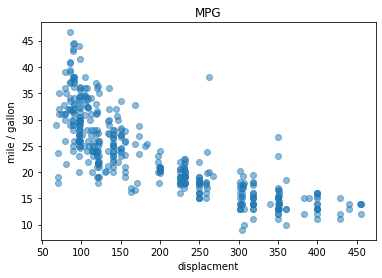

In [147]:
# plt.scatter(x=mpg['displacement'], y=mpg['mpg'])
plt.scatter(data=mpg, x='displacement', y='mpg', alpha=0.5)

plt.xlabel('displacment')
plt.ylabel('mile / gallon')
plt.title('MPG')

plt.show()

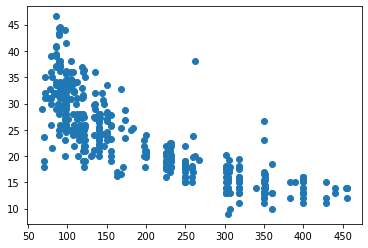

In [148]:
# plt.plot(mpg['displacement'], mpg['mpg'], 'o')
plt.plot('displacement', 'mpg', data=mpg, marker='o', linestyle='')

plt.show()

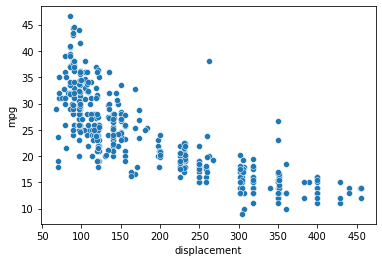

In [149]:
sns.scatterplot(data=mpg, x='displacement', y='mpg')
# plt.ylabel('mile/gallon')
plt.show()

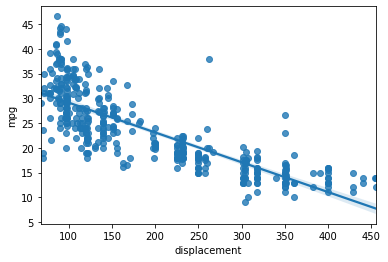

In [150]:
sns.regplot(data=mpg, x='displacement', y='mpg')
plt.show()

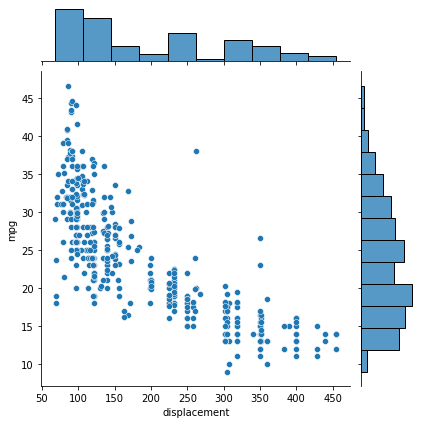

In [151]:
sns.jointplot(data=mpg, x='displacement', y='mpg')
plt.show()

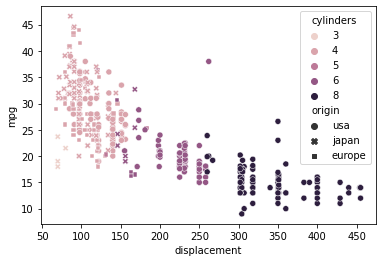

In [152]:
sns.scatterplot(data=mpg, x='displacement', y='mpg', 
                hue='cylinders', style='origin')
plt.show()

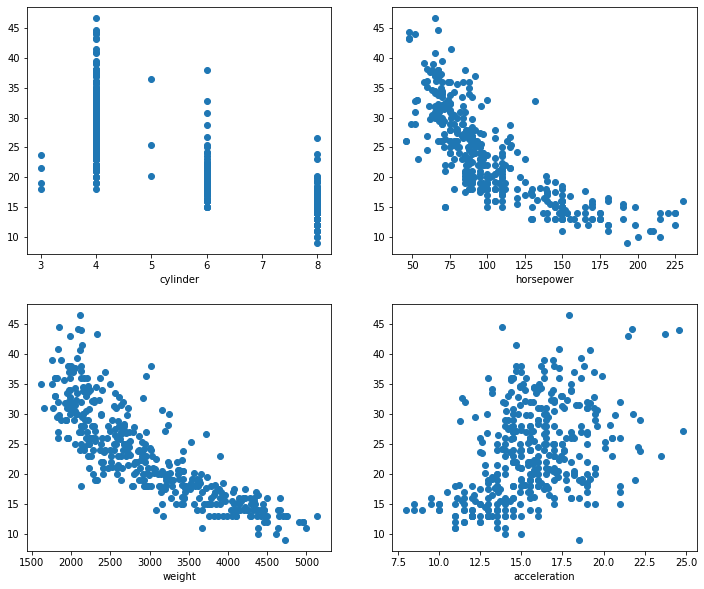

In [153]:
fig = plt.figure(figsize=(12, 10))
# ax1 = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(2, 2, 3)
# ax4 = fig.add_subplot(2, 2, 4)
axes = [fig.add_subplot(2, 2, i) for i in range(1, 5)]

# 해당 row를 찾아서 scatter 메서드 호출
axes[0].scatter(data=mpg, x='cylinders', y='mpg')
axes[0].set_xlabel('cylinder')

axes[1].scatter(data=mpg, x='horsepower', y='mpg')
axes[1].set_xlabel('horsepower')

axes[2].scatter(data=mpg, x='weight', y='mpg')
axes[2].set_xlabel('weight')

axes[3].scatter(data=mpg, x='acceleration', y='mpg')
axes[3].set_xlabel('acceleration')

plt.show()

In [154]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

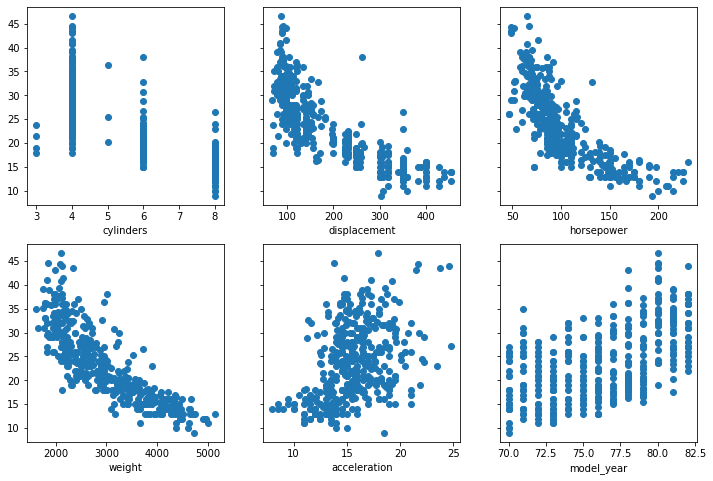

In [155]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(12, 8))

for row in range(0, 2):
    for col in range(0, 3):
        x_name = mpg.columns[row * 3 + col + 1] 
        axes[row, col].scatter(data=mpg, x=x_name, y='mpg')
        axes[row, col].set_xlabel(x_name)

plt.show()

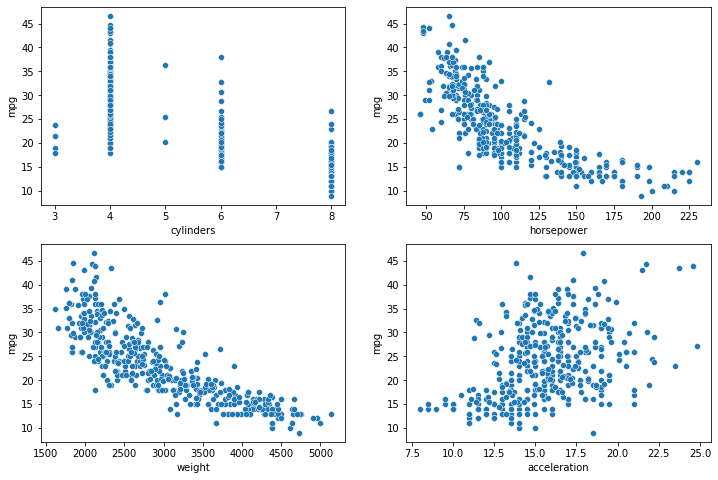

In [156]:
fig, axes = plt. subplots(nrows=2, ncols=2, figsize=(12, 8))

# seaborn 모듈에 있는 함수를 호출
sns.scatterplot(data=mpg, x='cylinders', y='mpg', ax=axes[0, 0])
sns.scatterplot(data=mpg, x='horsepower', y='mpg', ax=axes[0, 1])
sns.scatterplot(data=mpg, x='weight', y='mpg', ax=axes[1, 0])
sns.scatterplot(data=mpg, x='acceleration', y='mpg', ax=axes[1, 1])

plt.show()

* cylinder 별 mpg 평균 막대 그래프 

In [157]:
mpg_by_cyl = []
for cyl in mpg['cylinders'].unique():
    mpg_mean = mpg[mpg['cylinders'] == cyl]['mpg'].mean()
    # print(f'cylinder: {cyl}, mpg mean: {mpg_mean}')
    mpg_by_cyl.append(mpg_mean)

print(mpg_by_cyl)

[14.963106796116508, 29.28676470588236, 19.985714285714284, 20.55, 27.366666666666664]


In [158]:
s = pd.Series(data=mpg_by_cyl, index=mpg['cylinders'].unique())
s

8    14.963107
4    29.286765
6    19.985714
3    20.550000
5    27.366667
dtype: float64

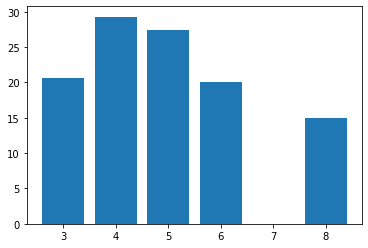

In [159]:
plt.bar(x=s.index, height=s.values)
plt.show()

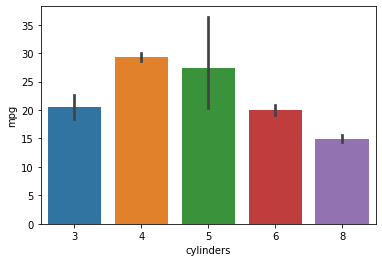

In [160]:
sns.barplot(data=mpg, x='cylinders', y='mpg')
plt.show()

* cylinder별 mpg의 boxplot 

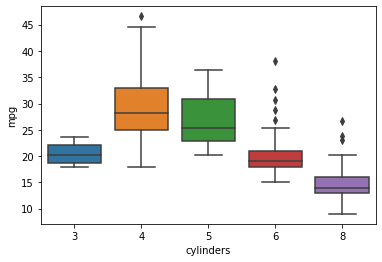

In [161]:
sns.boxplot(data=mpg, x='cylinders', y='mpg')
plt.show()

* origin별, cylinder별 mpg의 boxplot
    * origin별로 subplot을 생성 

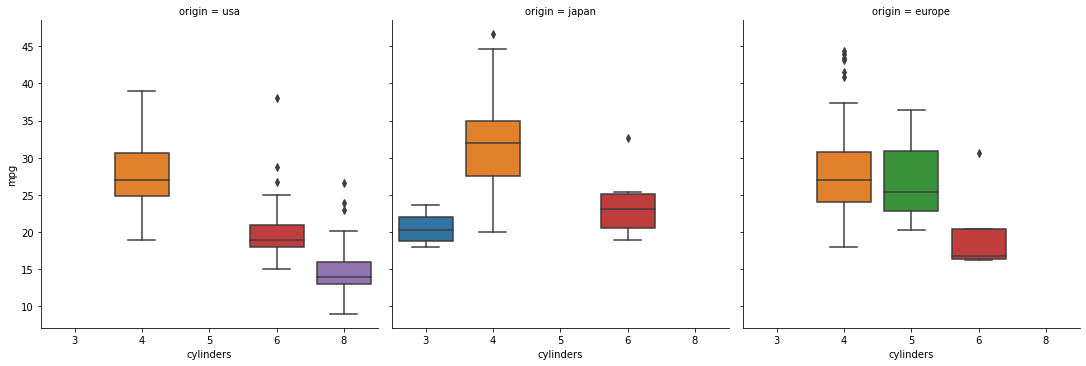

In [162]:
sns.catplot(data=mpg, x='cylinders', y='mpg', kind='box', col='origin')
plt.show()

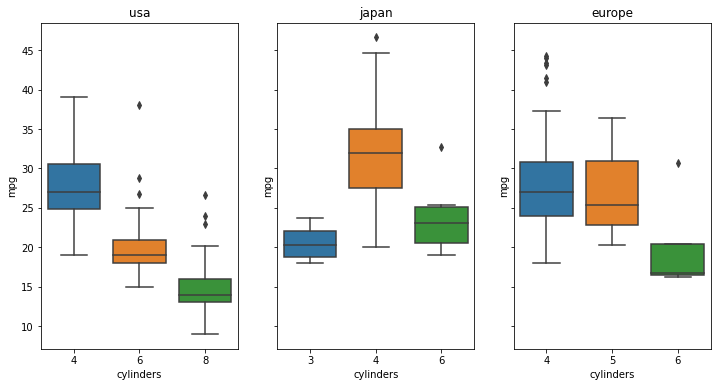

In [163]:
origins = mpg['origin'].unique()
origins

fig, axes = plt.subplots(ncols=len(origins), figsize=(12, 6), sharey=True)
for i, orig in enumerate(origins):
    sub_df = mpg[mpg['origin'] == orig]
    sns.boxplot(data=sub_df, x='cylinders', y='mpg', ax=axes[i])
    axes[i].set_title(orig)

* origin별, cylinder별 mpg의 평균 막대 그래프
    * origin 별로 subplot을 생성
    

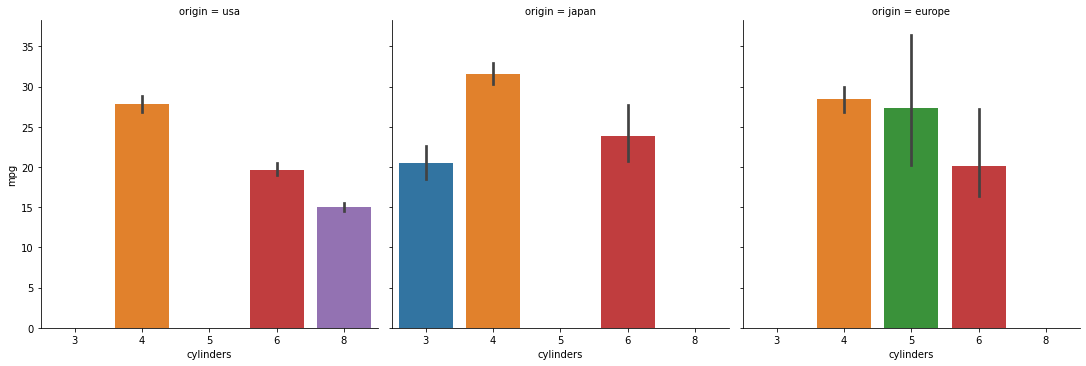

In [164]:
sns.catplot(data=mpg, x='cylinders', y='mpg', kind='bar',
            col='origin')
plt.show()

# iris 데이터 셋

* seaborn 패키지의 iris 예제 데이터 셋을 데이터 프레임으로 로드

In [165]:
iris = sns.load_dataset('iris')
print(iris.head())
print(iris.tail())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


* iris 데이터 프레임의 구조 파악: shape, columns, head, tail, describe, value_counts

In [166]:
print('shape:', iris.shape)
print('columns:', iris.columns)

shape: (150, 5)
columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [167]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [168]:
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

* 품종(species)을 제외한 4개 변수의 boxplot

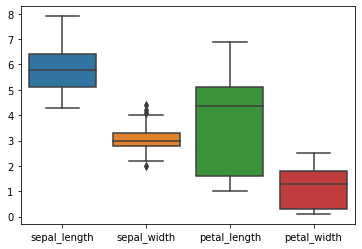

In [169]:
sns.boxplot(data=iris)  
# DataFrame에서 모든 숫자 타입 변수들의 box plot을 하나의 figure에 그려줌
plt.show()

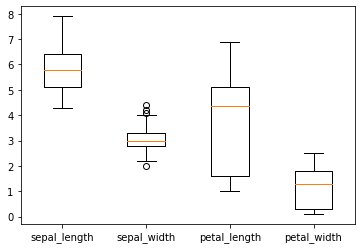

In [170]:
# plt.boxplot(x=[iris['sepal_length'], iris['sepal_width'], 
#                iris['petal_length'], iris['petal_width']], data=iris,
#             labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.boxplot(x=[iris[x] for x in iris.columns[:-1]],
            labels=iris.columns[:-1])

plt.show()

In [177]:
species = iris['species'].unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

* 품종별로 subplot의 컬럼을 구분, 데이터 프레임의 나머지 4개 변수의 box plot을 품종별로

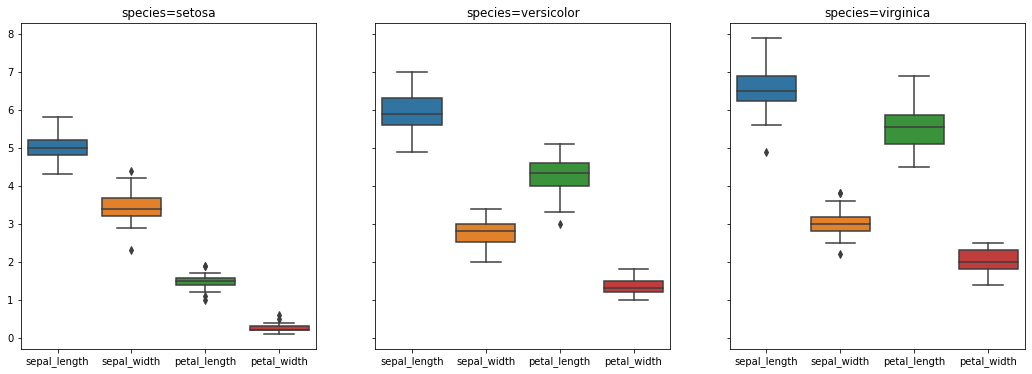

In [187]:
fig, axes = plt.subplots(ncols=len(species), figsize=(18, 6), sharey=True)

for i, s in enumerate(species):
    subset = iris[iris['species'] == s]
    sns.boxplot(data=subset, ax=axes[i])
    # axes[i].boxplot(x=[subset[x] for x in iris.columns[:-1]],
    #                 labels=iris.columns[:-1])
    axes[i].set_title(f'species={s}')

plt.show()

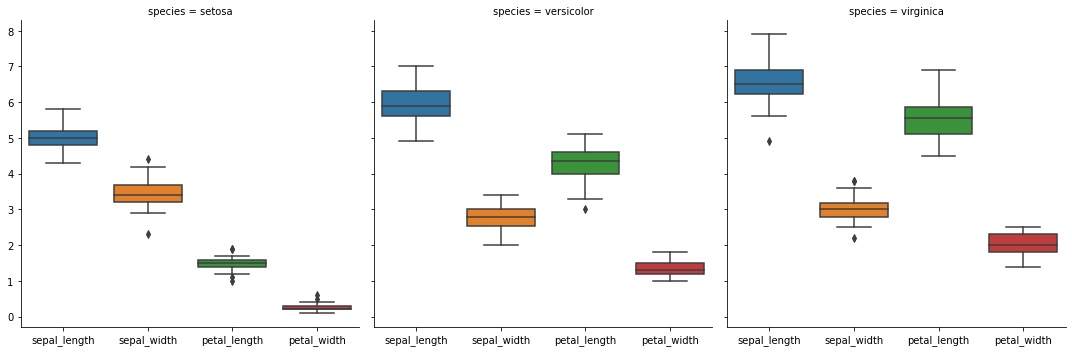

In [189]:
sns.catplot(data=iris, col='species', kind='box')
plt.show()

* petal_length ~ petal_width scatter plot
    * 품종별로 마커의 색깔이 다르게

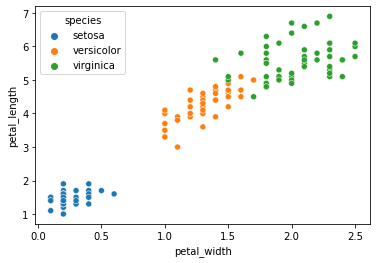

In [201]:
sns.scatterplot(data=iris, x='petal_width', y='petal_length', hue='species')
plt.show()

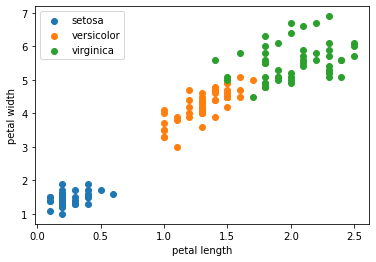

In [205]:
setosa = iris[iris['species'] == 'setosa']
plt.scatter(x='petal_width', y='petal_length', data=setosa,
            label='setosa')

versicolor = iris[iris['species'] == 'versicolor']
plt.scatter(x='petal_width', y='petal_length', data=versicolor,
            label='versicolor')

virginica = iris[iris['species'] == 'virginica']
plt.scatter(x='petal_width', y='petal_length', data=virginica,
            label='virginica')

plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

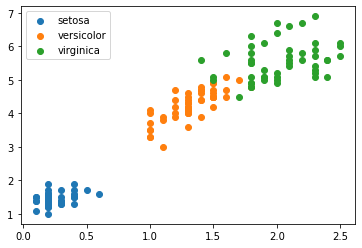

In [207]:
species = iris['species'].unique()
for s in species:
    subset = iris[iris['species'] == s]
    plt.scatter(x='petal_width', y='petal_length', data=subset, 
                label=s)
    
plt.legend()
plt.show()

* sepal_length ~ sepaal_width scatter plot
    * 품종별로 마커의 색깔이 다르게

In [212]:
def iris_scatter_plot(data, x, y): 
    species = data['species'].unique()
    for s in species:
        subset = data[data['species'] == s]
        plt.scatter(x, y, data=subset, label=s)
    
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)

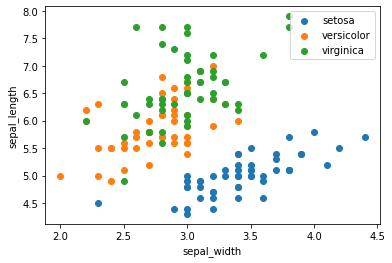

In [213]:
iris_scatter_plot(data=iris, x='sepal_width', y='sepal_length')
plt.show()

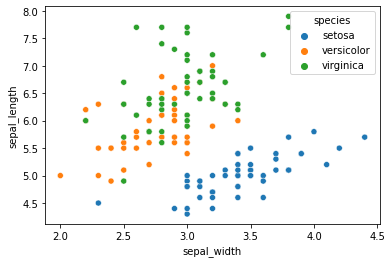

In [175]:
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue='species')

# pair plot

In [215]:
def iris_scatter_subplot(data, x, y, ax):
    species = data['species'].unique()
    for s in species:
        subset = data[data['species'] == s]
        ax.scatter(x, y, data=subset, label=s)
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)

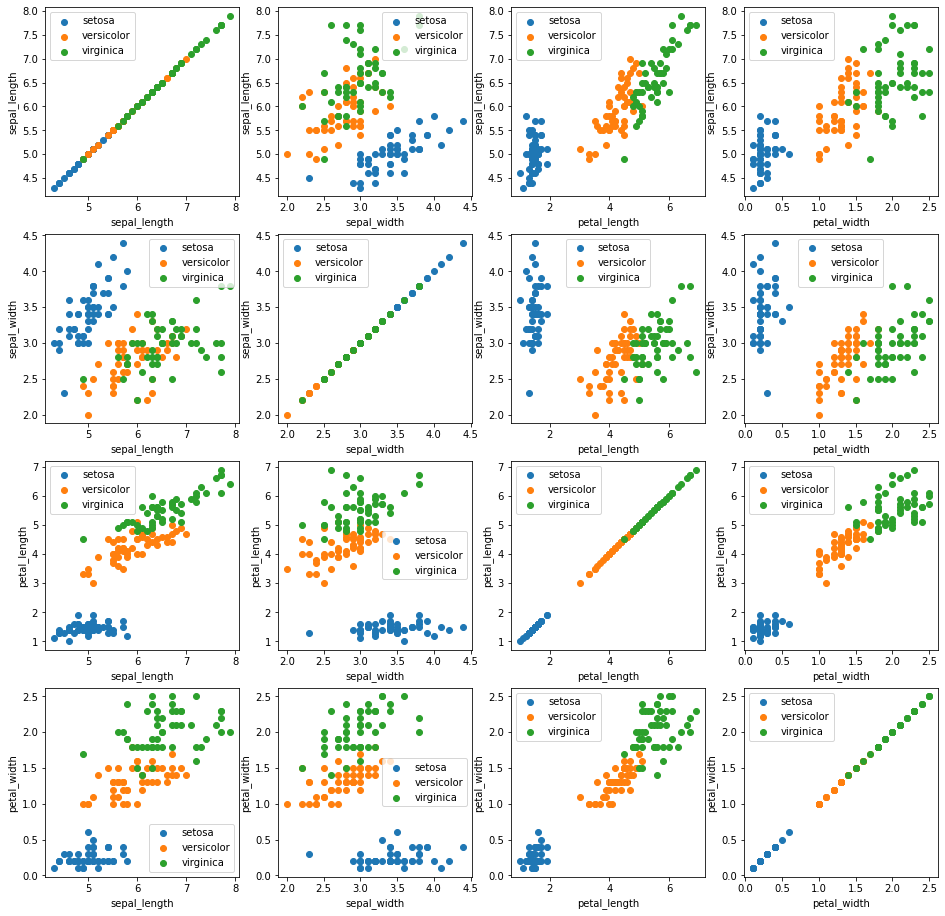

In [218]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

features = iris.columns[:-1]
for row, feature_x in enumerate(features):
    for col, feature_y in enumerate(features):
        iris_scatter_subplot(data=iris, x=feature_y, y=feature_x,
                             ax=axes[row, col])

plt.show()

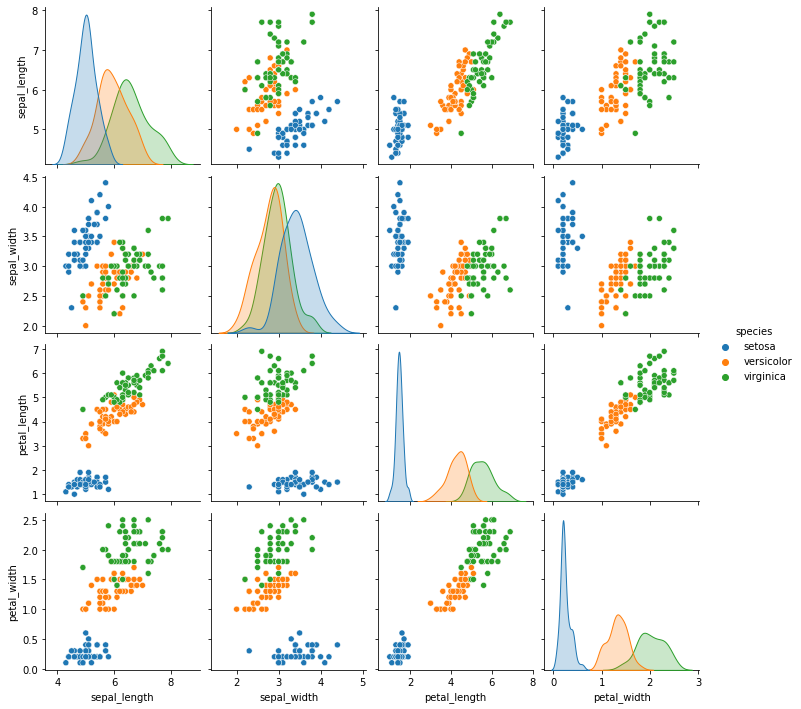

In [173]:
sns.pairplot(data=iris, hue='species')
plt.show()